<a href="https://colab.research.google.com/github/aniketmondal1210/CodePlayground/blob/main/Logistic_Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



This dataset contains information of users from the companies database. It contains information about UserID, Gender, Age, Estimated Salary, Purchased. We are using this dataset for predicting that a user will purchase the company's newly launched product or not


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Reading Data
from google.colab import files
uploaded = files.upload()

Saving User_Data.csv to User_Data.csv


In [ ]:
dataset = pd.read_csv("User_Data.csv")
dataset.shape

(400, 5)

In [ ]:
dataset.head()

,UserID,Gender,Age,EstimatedSalary,Purchased
0,15819374,Male,41,53793,0
1,15211341,Female,28,86570,1
2,15733620,Male,25,125084,0
3,15277574,Male,53,67892,1
4,15393726,Male,55,31015,1


In [ ]:
# Input
x = dataset.iloc[:, [2, 3]].values
# Output
y = dataset.iloc[:, 4].values
print(y)

[0 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1
 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0
 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1
 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0
 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1
 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 1
 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1]


In [ ]:
# Splitting into training set & test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
print(x_train[0:10,:])

[[-0.80280642  0.63529792]
 [ 0.7718655  -1.18923101]
 [-1.79733605 -0.13889256]
 [ 1.18625284 -0.93400783]
 [ 1.60064019  0.3697202 ]
 [ 0.19172321  1.56726028]
 [ 0.27460068 -1.0622531 ]
 [ 1.18625284 -1.52009086]
 [-0.0569092  -0.67838017]
 [-1.1343163   1.54129304]]


In [ ]:
# Fitting Logistic Regression to training set

from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting Test Set Results
y_pred=classifier.predict(x_test)

In [ ]:
# Evaluating Performance of our model
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

print("Confusion Matrix: \n", cm)

Confusion Matrix: 
 [[39  8]
 [51  2]]


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.41


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.83      0.57        47
           1       0.20      0.04      0.06        53

    accuracy                           0.41       100
   macro avg       0.32      0.43      0.32       100
weighted avg       0.31      0.41      0.30       100



<ipython-input-18-1e1b9f6c584c>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


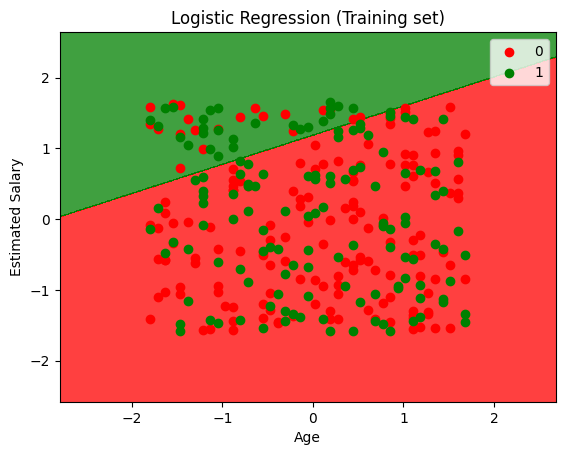

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-19-2f06e25c4fe6>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


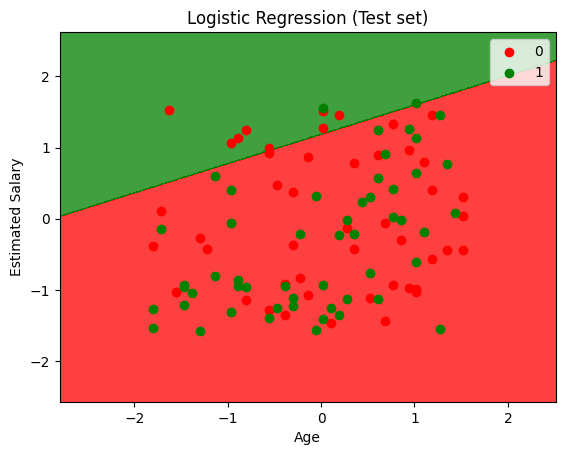

In [ ]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
